## Cluster Analysis on Vehicle data for city-vehicles for better prediction of miles/gallon figures for each class of vehicle

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns
city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and
4 continuous variables.

#### $Dataset:$
#### $Attribute Information:$
1. Car Name – Name of the car
2. Cyl – No of cylinders in the car – Multivalued discrete
3. Disp – Displacement – continuous
4. Hp – Horsepower – continuous
5. Wt – Weight – continuous
6. Acc – Acceleration – continuous
7. Yr – Model of the car – Multivalued discrete
8. Mpg - Miles per gallon - continuous

#### *Steps to follow:*
1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial import distance

from sklearn import metrics
from scipy import stats

In [32]:
data = pd.read_csv('cars.csv')

### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [33]:
data.shape

(398, 8)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


#### *Thus there are 398 datapoints divided between 7 features & 1 target variable (mpg). As thid target variable is a CONTINUOUS one, our problem is a REGRESSION problem.*

#### *Of the 7 features, none of the features seems to have NULL values & 2 are OBJECT types, while the rest are CONTINUOUS numbers, either FLOAT or INTEGER*

In [35]:
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


#### *There are 2 categorical features & 5 continuous features. The column MPG is the TARGET variable & is continuous in nature*

In [36]:
# Checking for NaN values
data.isnull().any()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

#### *None of the features have any missing values in the form NaN*

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [38]:
data['car name'].value_counts()

ford pinto                    6
toyota corolla                5
amc matador                   5
ford maverick                 5
chevrolet chevette            4
                             ..
chevroelt chevelle malibu     1
honda accord cvcc             1
datsun 610                    1
volvo 245                     1
pontiac j2000 se hatchback    1
Name: car name, Length: 305, dtype: int64

In [39]:
data['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
107     1
230     1
108     1
66      1
89      1
Name: hp, Length: 94, dtype: int64

#### *Thus we can see from the above that although the "hp" feature is saved as an object type, we need to convert the same as a continuous variable. Similar approach can be taken for "car name" also. However, from our knowledge, "mpg" of a car is not dependent on the car name & hence we can drop this feature*

In [40]:
data_bkup=data.copy()
data.drop('car name',axis=1,inplace=True)

#### *By analysing the data we have observed that some of the fields in "hp" column has special characters (?). We will be replacing the same with the Median values of "hp" in the below steps*

In [41]:
#Replacing ? with NaN values
data = data.replace('?', np.nan)

In [42]:
#The above transformation now registers the missing values of ? as NaN
data.isnull().any()

cyl     False
disp    False
hp       True
wt      False
acc     False
yr      False
mpg     False
dtype: bool

In [43]:
#Replacing the above NaNs as MEDIAN
data = data.apply(lambda x: x.fillna(x.median()),axis=0)

In [44]:
#Verifying if the above NaNs are still present
data.isnull().any()

cyl     False
disp    False
hp      False
wt      False
acc     False
yr      False
mpg     False
dtype: bool

In [45]:
#Finally converting the object type feature to continuous float data
data['hp']=data['hp'].astype(str).astype(float)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


#### *The above confirms that now we have all features are continuous data*

### 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

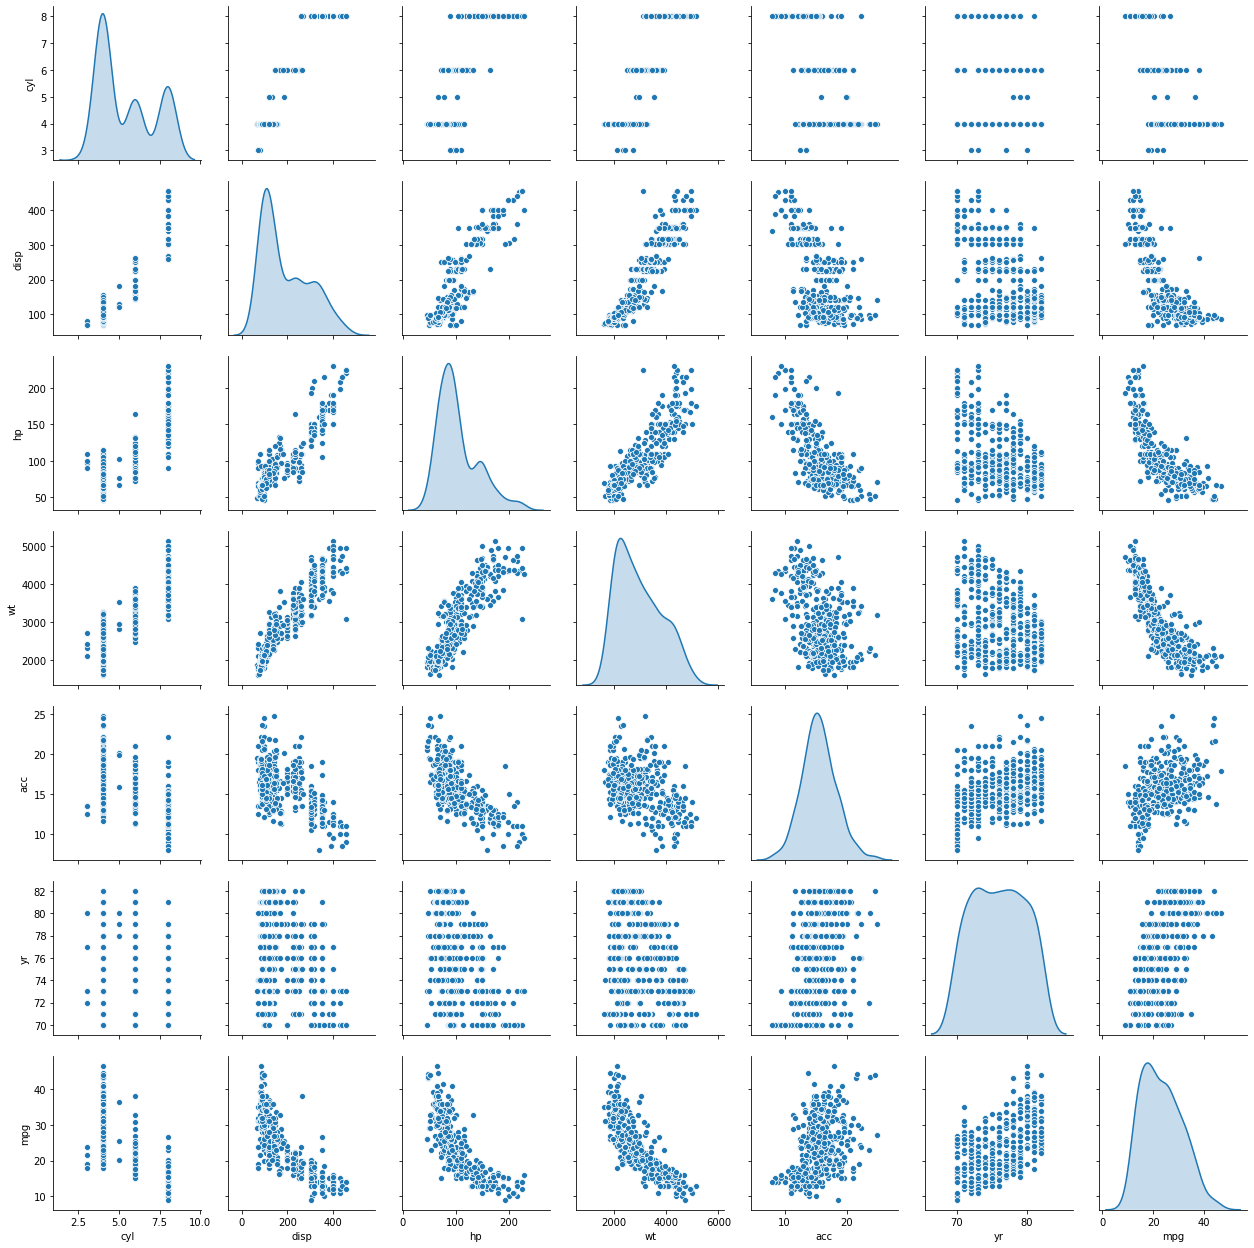

In [47]:
sns.pairplot(data,diag_kind='kde')

#### *From the above pair-plot analysis, it seems there are 3-9 clusters (features "cyl", "disp", "hp" show 3 distinct gaussians)*

#### *The feature "cyl" shows negative correlation with the target variable, with "mpg" falling as "cyl" increases. Similarly, there exists a curvilinear negative correlation with "mpg" for "disp", "hp" & "wt". The "acc" feature doesn't seem to have any strong correlation with "mpg", while "yr" has somewhat positive correlation*

### 3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

In [48]:
#Removing mpg from the clustering step
y=data['mpg']
data.drop(columns=['mpg','acc'],axis=1,inplace=True)

In [49]:
columns=data.columns
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data),columns=columns)

In [50]:
distortion=[]
# Let us check optimal number of clusters-
cluster_range = range(2,10) #Based on the class distribution, our classes would be between 3-9
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters,random_state=1)
  clusters.fit(data_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )   # capture the intertia
  distortion.append(sum(np.min(distance.cdist(data_scaled, clusters.cluster_centers_, 'euclidean'), axis=1))/ data_scaled.shape[0])
  cluster_sil_scores.append(metrics.silhouette_score(data_scaled, labels, metric='euclidean'))
    
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors,"distortion":distortion,"avg_sil_scores":cluster_sil_scores} )
clusters_df[0:15]

,num_clusters,cluster_errors,distortion,avg_sil_scores
0,2,799.985358,1.335378,0.525972
1,3,552.116851,1.094043,0.415979
2,4,384.894220,0.896691,0.424546
3,5,323.734115,0.829197,0.396248
4,6,277.791590,0.776233,0.388733
5,7,246.507608,0.735865,0.392296
6,8,215.910346,0.679574,0.360836
7,9,194.602132,0.635958,0.341206


Text(0, 0.5, 'Distortion')

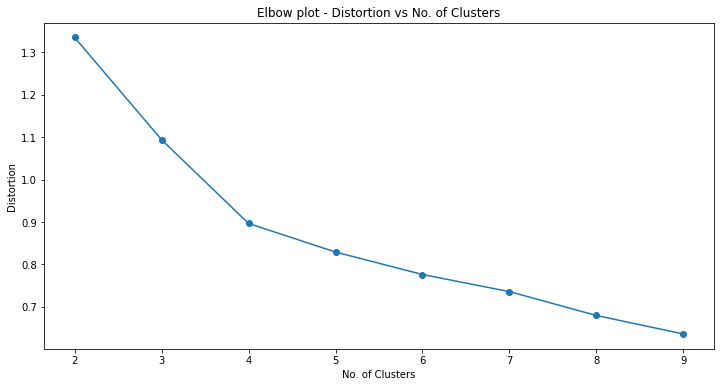

In [51]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )
plt.title('Elbow plot - Distortion vs No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Distortion')

#### *From the above elbow-plot, it seems the optimal number of clusters is 4*

In [52]:
kmeans = KMeans(n_clusters = 4, n_init=5, random_state = 1)
kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
pd.DataFrame(data = centroids, columns=list(data_scaled.columns))

,cyl,disp,hp,wt,yr
0,0.446597,0.330814,-0.017824,0.354361,0.115937
1,-0.846671,-0.780009,-0.693340,-0.737054,1.047122
2,-0.806225,-0.800235,-0.595829,-0.790572,-0.786267
3,1.498191,1.515492,1.528835,1.426842,-0.689873


In [53]:
#Appending the label column to the initial dataset
data_scaled['Cluster'] = kmeans.labels_
data_scaled.head()

,cyl,disp,hp,wt,yr,Cluster
0,1.498191,1.090604,0.673118,0.630870,-1.627426,3
1,1.498191,1.503514,1.589958,0.854333,-1.627426,3
2,1.498191,1.196232,1.197027,0.550470,-1.627426,3
3,1.498191,1.061796,1.197027,0.546923,-1.627426,3
4,1.498191,1.042591,0.935072,0.565841,-1.627426,3


In [54]:
data_scaled.head()

,cyl,disp,hp,wt,yr,Cluster
0,1.498191,1.090604,0.673118,0.630870,-1.627426,3
1,1.498191,1.503514,1.589958,0.854333,-1.627426,3
2,1.498191,1.196232,1.197027,0.550470,-1.627426,3
3,1.498191,1.061796,1.197027,0.546923,-1.627426,3
4,1.498191,1.042591,0.935072,0.565841,-1.627426,3


In [55]:
#Looking at the value counts
data_scaled.groupby('Cluster').count()['cyl']

Cluster
0     89
1    122
2     94
3     93
Name: cyl, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BAAB16208>,
      dtype=object)

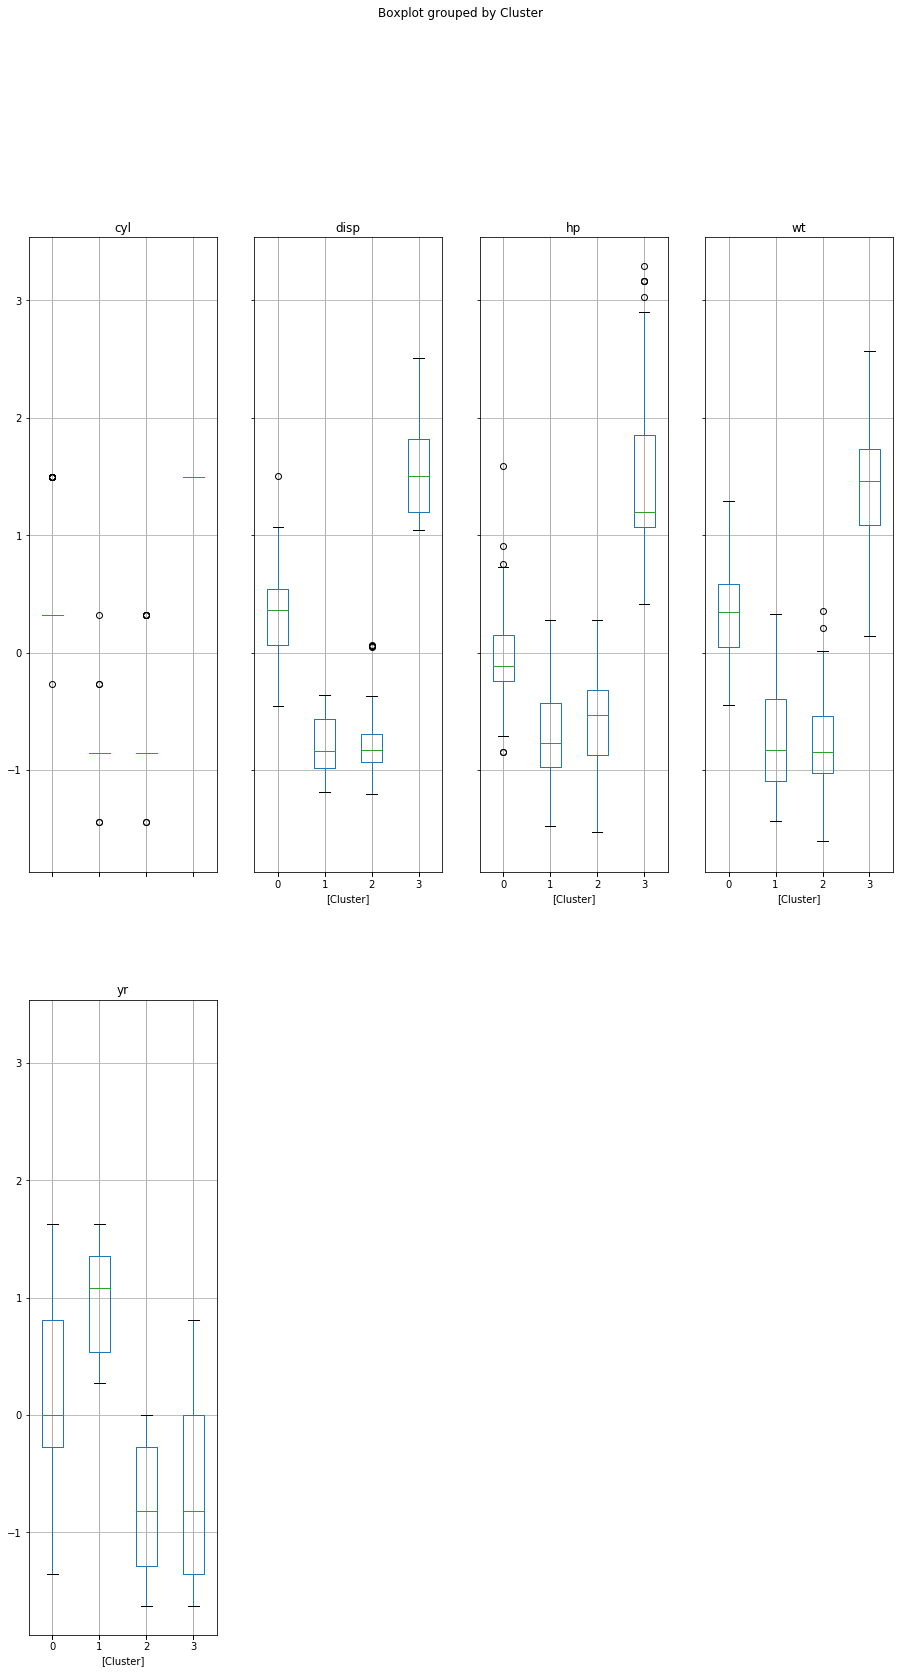

In [56]:
data_scaled.boxplot(by = 'Cluster', layout=(3,4), figsize=(15, 40))

#### *Thus we have identified 4 different clusters and we have also been able to segregate the dataset into 4 different sets based on the CLUSTER NUMBER.*

#### *We will now proceed to perform REGRESSION analysis on each of these different clusters individually*

### 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [57]:
#Performing Linear Regression for the entire dataset first
lr1=LinearRegression()
lr1.fit(data_scaled,y)
print ("The coefficients are: ",lr1.coef_)
print ("The intercept is: ",lr1.intercept_)
print ("The model score is: ",lr1.score(data_scaled, y))

The coefficients are:  [-0.41990783  0.86787109 -1.09189032 -5.46908871  3.18103523  1.14740559]
The intercept is:  21.81652790973764
The model score is:  0.8233103522455674


In [58]:
#Adding back the target variable to the dataset for Regression analysis
data_scaled['mpg']=y
lr=LinearRegression()

In [59]:
for i in range(0,4):
    z = data_scaled[data_scaled['Cluster']==i]
    y=z['mpg']
    z.drop(columns=['mpg','Cluster'],axis=1,inplace=True)
    lr.fit(z,y)
    print ("For cluster: %d, the coefficients are: "%i,lr.coef_)
    print ("For cluster: %d, the intercept is: "%i,lr.intercept_)
    print ("For cluster: %d, the model score is: "%i,lr.score(z, y))
    print ('\n')

For cluster: 0, the coefficients are:  [-0.45139875  0.30516798 -0.86194177 -4.09826678  2.61614561]
For cluster: 0, the intercept is:  21.0409753049246
For cluster: 0, the model score is:  0.4656218960104349


For cluster: 1, the coefficients are:  [ 3.74292902 -3.31911488 -5.80732126 -4.57780313  3.19447929]
For cluster: 1, the intercept is:  21.5853642968783
For cluster: 1, the model score is:  0.6469411707534005


For cluster: 2, the coefficients are:  [ 3.26387385 -4.53956555 -0.39376978 -5.50006223  1.54417721]
For cluster: 2, the intercept is:  20.88001698883181
For cluster: 2, the model score is:  0.616905156183057


For cluster: 3, the coefficients are:  [ 2.79976958  1.48621653 -0.93618961 -2.37168422  1.3710523 ]
For cluster: 3, the intercept is:  13.818511766510152
For cluster: 3, the model score is:  0.5574537766921942


